## Installation
You should just be able to install using "pip install jupyterLab"
                                     and "pip install notebook"

## Other options
Or you can use the browser https://jupyter.org/try-jupyter/lab/?path=notebooks%2FIntro.ipynb

In [20]:
# This is Code
print("Hello Jupyter!")

Hello Jupyter!


## This is text
Below is a function that will print the user's name

In [21]:
def say_hello(recipient):
    return str("Hello, " + recipient + "!!")

say_hello('Cas')

'Hello, Cas!!'

In [22]:
# This won't work without running the previous chunk
say_hello("George")

'Hello, George!!'

## Libraries
Remember, you can install these by entering "pip install numpy" into the terminal

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in Data

In [6]:
MatData = pd.read_csv('MatTesting.csv') 
type(MatData)
print(MatData.head(5))

     shape  spacing  cycle   MaxAngle   MaxExt  MaxIndex  MaxLoad       Work
0  Hexagon      0.3      1  30.633402  17.3415       352  15.2411  28.190916
1  Hexagon      0.3      2  30.612656  17.3258       344  14.7277  20.290163
2  Hexagon      0.3      3  30.634459  17.3423       358  13.6376  18.388421
3   Circle      0.1      1  30.612789  17.3259       351   2.4088   9.807667
4   Circle      0.1      2  30.429174  17.1874       348   2.3786   8.235783


Plotting

<Axes: xlabel='shape', ylabel='MaxLoad'>

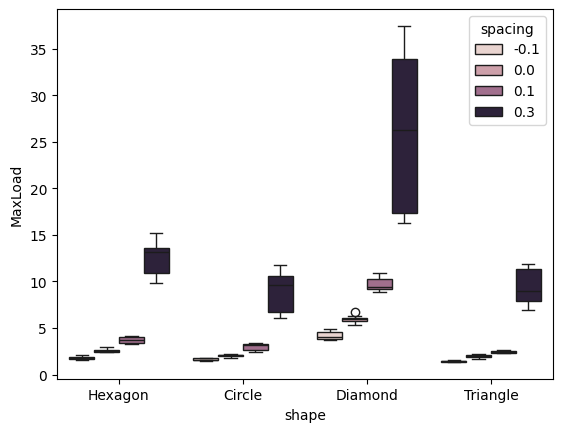

In [7]:
# create a grouped boxplot using seaborn
sns.boxplot(data = MatData, 
            x = 'shape', 
            y = 'MaxLoad', 
            hue = 'spacing')

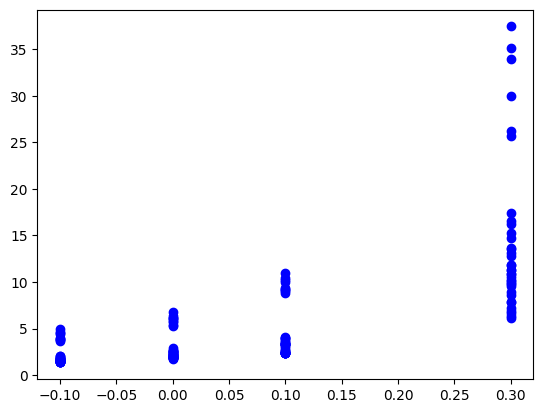

In [8]:
#matplotlib scatter plots
plt.scatter(MatData['spacing'], MatData['MaxLoad'], c ="blue")
 
# To show the plot
plt.show()

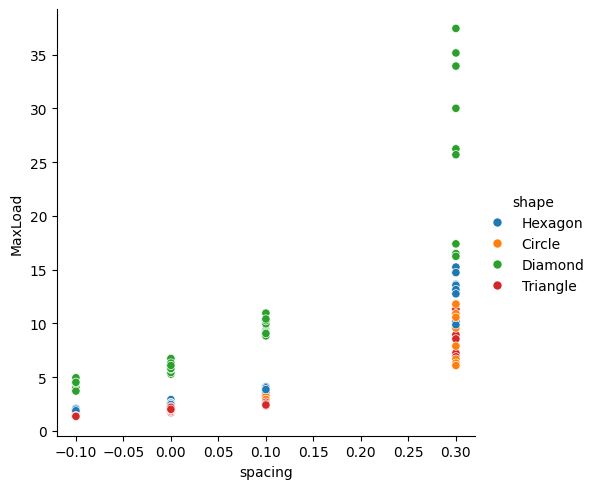

In [12]:
# seaborn grouped scatter plots
sns.relplot(data = MatData, 
            x = 'spacing', 
            y = 'MaxLoad', 
            hue = 'shape')

Summary Statistics

In [9]:
## what is the median work done?
MatData["Work"].mean()
## print and round to two decimal places
print("Mean work is:", round(MatData["Work"].mean(),2))

## summary statiscits (means, standard deviation, quartiles, etc)
MatData.describe()

Mean work is: 14.58


,spacing,cycle,MaxAngle,MaxExt,MaxIndex,MaxLoad,Work
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.075000,2.000000,29.929438,16.825861,340.875000,6.116019,14.583793
std,0.148418,0.819346,1.030803,0.735107,15.651303,6.647651,11.122974
min,-0.100000,1.000000,24.556930,13.126500,271.000000,1.362000,5.806286
25%,-0.025000,1.000000,29.646659,16.606075,336.000000,2.044900,7.891862
50%,0.050000,2.000000,30.347628,17.126150,345.500000,3.367000,10.379281
75%,0.150000,3.000000,30.605914,17.320700,351.000000,8.871150,17.686194
max,0.300000,3.000000,30.634591,17.342400,359.000000,37.439300,84.368883


Group Summary Statistics

In [10]:
## print out means by shape
print(MatData["Work"].groupby(MatData["shape"]).mean())

## print out means of all numeric values
MatData.groupby("shape").mean(numeric_only=True)

shape
Circle      10.573718
Diamond     25.090568
Hexagon     11.968035
Triangle    10.702852
Name: Work, dtype: float64


,spacing,cycle,MaxAngle,MaxExt,MaxIndex,MaxLoad,Work
shape,,,,,,,
Circle,0.075,2.0,29.631871,16.607978,336.444444,3.882628,10.573718
Diamond,0.075,2.0,30.480508,17.226986,349.388889,11.592639,25.090568
Hexagon,0.075,2.0,30.031553,16.896306,342.111111,5.190358,11.968035
Triangle,0.075,2.0,29.573821,16.572175,335.555556,3.798453,10.702852


## More advanced statistics
https://towardsdatascience.com/anova-t-test-and-other-statistical-tests-with-python-e7a36a2fdc0c

In [18]:
## stats libraries
from scipy import stats
import pingouin as pg
from statsmodels.multivariate.manova import MANOVA

In [17]:
## Group your data by shape for t-tests
circle = MatData[(MatData['shape'] == 'Circle')]
triangle = MatData[(MatData['shape'] == 'Triangle')]
diamond = MatData[(MatData['shape'] == 'Diamond')]
hexagon = MatData[(MatData['shape'] == 'Hexagon')]

# test whether there is a difference between circle and diamond
#print(stats.ttest_ind(circle['MaxLoad'], diamond['MaxLoad']))

## for more complicated data use pingouin
# use anova to determine if there is a difference between all your groups
aov = pg.anova(data=MatData, dv='MaxLoad', between='shape', detailed=True)
#print(aov)

## use a paired t-test to determine exactly which groups are different
ttest = pg.pairwise_tests(data=MatData, dv='MaxLoad', between='shape').round(5)
#print(ttest)

NameError: name 'MaxData' is not defined

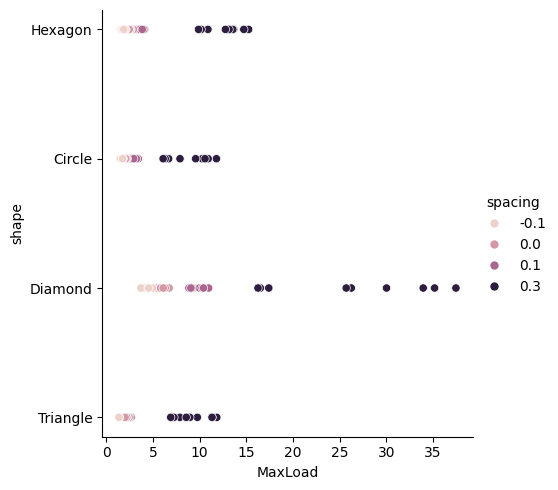

In [27]:
# seaborn grouped scatter plots
sns.relplot(data = MatData, 
            x = 'MaxLoad', 
            y = 'shape', 
            hue = 'spacing')

sns.boxplot(data = MaxData,
            x = 'cycle',
            y = 'MaxLoad',
            hue = 'spacing')